In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset from: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
# 1) id: unique identifier
# 2) gender: "Male", "Female" or "Other"
# 3) age: age of the patient
# 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
# 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
# 6) ever_married: "No" or "Yes"
# 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
# 8) Residence_type: "Rural" or "Urban"
# 9) avg_glucose_level: average glucose level in blood
# 10) bmi: body mass index
# 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
# 12) stroke: 1 if the patient had a stroke or 0 if not
# *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# Drop the 1 sample with gender as "Other"
df = df[df['gender'] != "Other"]

# Drop id column
df = df.drop('id', axis=1)

In [4]:
# Label overview
df.stroke.value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


Missing bmi values.

## Data Exploration

In [6]:
df_stroke = df.query('stroke == 1').drop('stroke', axis=1)

The incidence of stroke cases increases exponentially with age, with the vast majority of stroke cases happening after the age of 37.

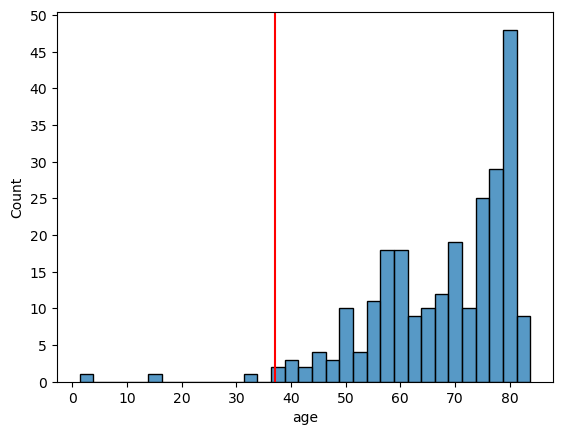

In [7]:
sns.histplot(x=df_stroke.age, binwidth=2.5)
plt.axvline(x=37, color='red')
plt.xticks(np.arange(0, df_stroke.age.max(), 10))
plt.yticks(np.arange(0, 51, 5));

The mean age of female stroke patients is slightly lower than that of males but their median age is slightly higher.

In [8]:
df_stroke.groupby('gender').age.agg(['mean', 'median']).rename_axis('age', axis=1)

age,mean,median
gender,,
Female,67.137021,72.0
Male,68.500000,70.5


The vast majority of stroke patients have a bmi that falls between 19 and 50.

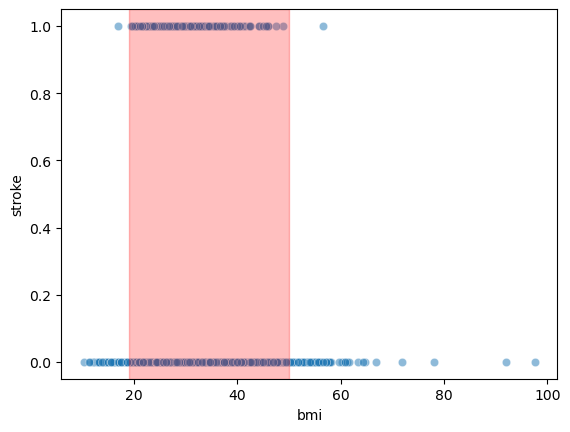

In [9]:
sns.scatterplot(x=df.bmi, y=df.stroke, alpha=.5)
plt.axvspan(19, 50, color='red', alpha=0.25);

Male stroke patients tend to have a slightly higher bmi than female patients, possibly becaused of higher muscle mass.

In [10]:
df_stroke.groupby('gender').bmi.agg(['mean', 'median']).rename_axis('bmi', axis=1)

bmi,mean,median
gender,,
Female,30.218333,29.1
Male,30.812360,30.0


Across the numerical variables age, avg_glucose_level, and bmi, there does not seem to be any anomalies. There are some patients with a very high bmi, but not outside the realm of possibility.

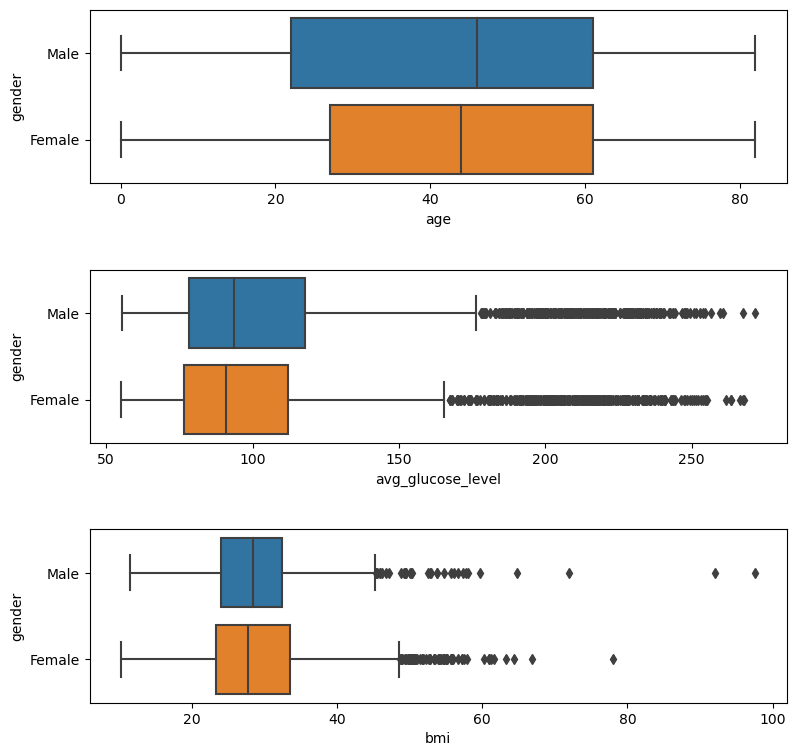

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(9, 9))
for i, cat in enumerate(['age', 'avg_glucose_level', 'bmi']):
    sns.boxplot(x=df[cat], ax=ax[i], y=df.gender)
    ax[i].set_xlabel(cat)
plt.subplots_adjust(hspace=0.5)

Stroke cases are slightly higher among urbanites than ruralites, possibly because of factors such as higher stress and unhealthier diets.

stroke,0,1
Residence_type,,
Rural,0.954636,0.045364
Urban,0.947997,0.052003


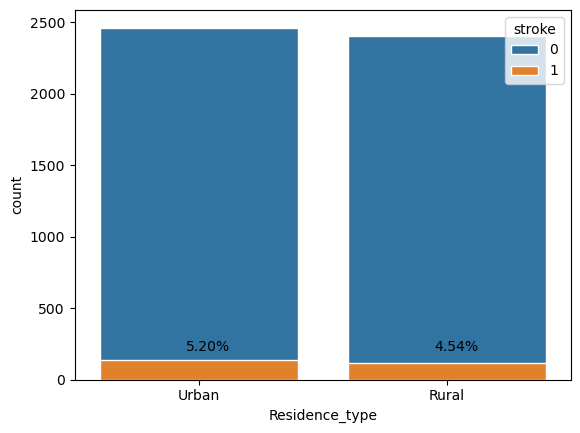

In [12]:
sns.countplot(data=df, x='Residence_type', hue='stroke', dodge=False, edgecolor='white')
plt.text(-0.05, 200, '5.20%')
plt.text(0.95, 200, '4.54%')
pd.crosstab(df.Residence_type, df.stroke, normalize='index')

Self-employed persons have the largest proportion of stroke cases among employed persons, possibly linked to stress levels once again. Strokes rarely happen among children.

stroke,0,1
work_type,,
Govt_job,0.949772,0.050228
Never_worked,1.000000,0.000000
Private,0.949042,0.050958
Self-employed,0.920635,0.079365
children,0.997089,0.002911


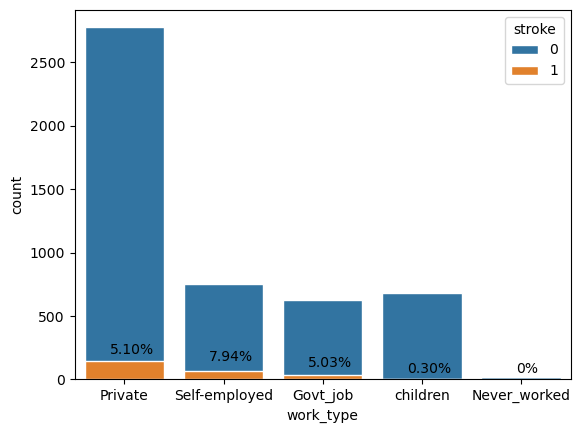

In [13]:
sns.countplot(data=df, x='work_type', hue='stroke', dodge=False, edgecolor='white')
plt.text(-0.15, 200, '5.10%')
plt.text(0.85, 150, '7.94%')
plt.text(1.85, 100, '5.03%')
plt.text(2.85, 50, '0.30%')
plt.text(3.95, 50, '0%')
pd.crosstab(df.work_type, df.stroke, normalize='index')

The incidence of stroke cases among the unknown group < never smoked group < smokes group < formerly smoked group, which suggests that the unknown group consists primarily of persons who never smoked.

stroke,0,1
smoking_status,,
Unknown,0.969560,0.030440
formerly smoked,0.920814,0.079186
never smoked,0.952431,0.047569
smokes,0.946768,0.053232


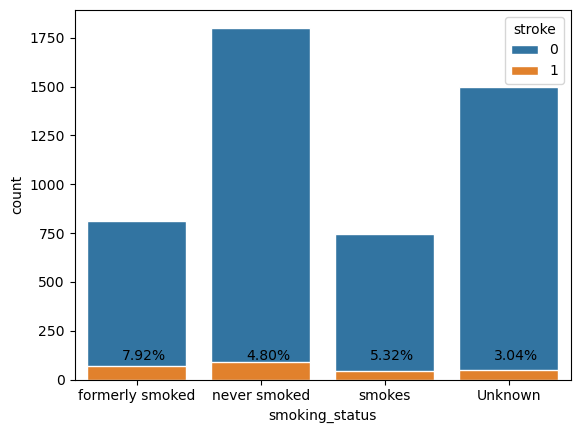

In [14]:
sns.countplot(x=df.smoking_status, hue=df.stroke, edgecolor='white', dodge=False)
plt.text(-0.12, 100, '7.92%')
plt.text(0.88, 100, '4.80%')
plt.text(1.88, 100, '5.32%')
plt.text(2.88, 100, '3.04%');
pd.crosstab(df.smoking_status, df.stroke, normalize='index')

Young children, who are likely to have never smoked, comprise the bulk of the Unknown group.

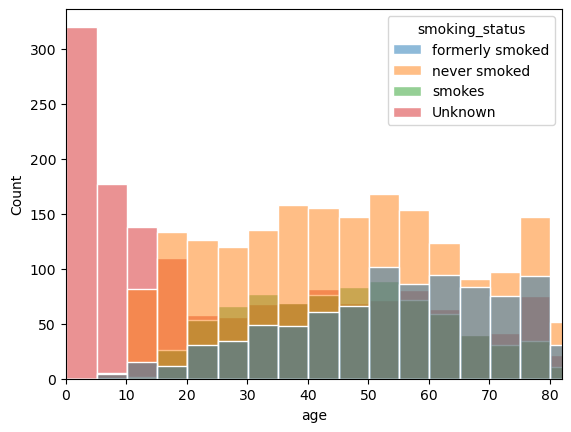

In [15]:
sns.histplot(x=df.age, hue=df.smoking_status, edgecolor='white', binwidth=5);
plt.xlim(0, df.age.max());

The age by which one experiences a stroke is approximately 10 years earlier among active smokers compared with ex-smokers and non-smokers.

In [16]:
df_stroke.groupby('smoking_status').age.agg(['mean', 'median']).rename_axis('age', axis=1)

age,mean,median
smoking_status,,
Unknown,65.836596,71.0
formerly smoked,68.628571,70.0
never smoked,70.311111,74.0
smokes,62.809524,61.0


## Predicting stroke cases

In [17]:
# Need to fill missing bmi values first
# Transform categorical features into numerical features for usage in correlation matrix
df2 = df.copy()
df2.work_type = df2.work_type.replace({'Private': 1, 'Self-employed': 3, 'Govt_job': 2, 'children': 0, 'Never_worked': 0}) # Lumping 'children' and 'Never_worked' persons together
df2.gender = df2.gender.replace({'Male': 0, 'Female': 1})
df2.Residence_type = df2.Residence_type.replace({'Urban': 0, 'Rural': 1})
df2.ever_married = df2.ever_married.replace({'Yes': 1, 'No': 0})
df2.smoking_status = df2.smoking_status.replace({'Unknown': 0, 'never smoked': 1, 'smokes': 2, 'formerly smoked': 3})

bmi has the strongest correlations with the features age, ever_married, work_type, avg_glucose_level, smoking_status and hypertension. 

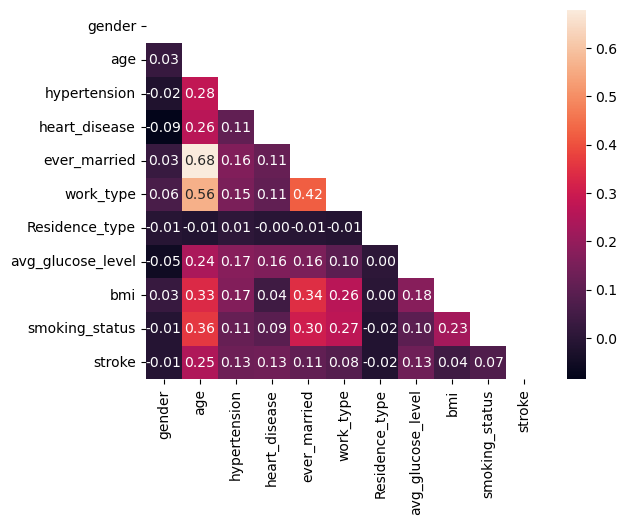

In [18]:
mask = np.triu(np.ones_like(df2.corr(numeric_only=True), dtype=bool))
sns.heatmap(df2.corr(numeric_only=True), mask=mask, annot=True, fmt=".2f");

In [19]:
def fill_missing(data, impute_strategy: str):
    """Fills in missing bmi values by using the mean or median bmi value of other samples that fall in
      the same age and avg_glucose_level ranges and have the same hypertension, work_type, smoking_status, and ever_married values"""
    if impute_strategy not in ['mean', 'median']:
        raise Exception('Argument for impute_strategy is either "mean" or "median"')
    
    na_df = data.query('bmi.isna()')
    age_bins = np.arange(0, 101, 20)
    glucose_bins = np.arange(50, 301, 50)

    df = data.copy()
    for i in range(len(na_df)):
        for age in age_bins: # Find out in which age range the current sample lies 
            if age <= na_df.iloc[i].age < age + 20:
                left_age = age
                right_age = age + 20
                break

        for glucose in glucose_bins: # Find out in which avg_glucose_level range the current sample lies in
            if glucose <= na_df.iloc[i].avg_glucose_level < glucose + 50:
                left_glucose = glucose
                right_glucose = glucose + 50
                break
        
        na_smoking_status = na_df.iloc[i].smoking_status # Find out the current sample's smoking_status value
        na_work_type = na_df.iloc[i].work_type # Find out the current sample's work_type value
        na_hypertension = na_df.iloc[i].hypertension # Find out the current sample's hypertension value
        na_ever_married = na_df.iloc[i].ever_married # Find out the current sample's ever_married value
        na_loc = na_df.iloc[i].name # Find out the index of the current sample

        bmi_query = data.query('age.between(@left_age, @right_age, inclusive="left") \
                               and avg_glucose_level.between(@left_glucose, @right_glucose, inclusive="left") \
                               and work_type == @na_work_type \
                               and hypertension == @na_hypertension \
                               and ever_married == @na_ever_married').bmi
        
        if bmi_query.sum() == 0: # Loosen the grouping conditions by dropping the avg_glucose_level and work_type criteria
            bmi_query = data.query('age.between(@left_age, @right_age, inclusive="left") \
                                    and hypertension == @na_hypertension \
                                    and ever_married == @na_ever_married').bmi
        
        if impute_strategy == 'mean':
            new_value = bmi_query.apply('mean')
        elif impute_strategy == 'median':
            new_value = bmi_query.apply('median')

        df.loc[na_loc, 'bmi'] = new_value
            
    return df

In [20]:
from sklearn.model_selection import train_test_split
X = df.copy()
y = X.pop('stroke')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

In [21]:
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from catboost import CatBoostClassifier

In [22]:
fill_missing_transformer = FunctionTransformer(fill_missing, kw_args={'impute_strategy': 'mean'})

ct = make_column_transformer((RobustScaler(), make_column_selector(dtype_exclude=object)),
                             (OneHotEncoder(), make_column_selector(dtype_include=object)))

preprocessing_pipeline = make_pipeline(fill_missing_transformer, ct)

In [23]:
X_train = preprocessing_pipeline.fit_transform(X_train)
X_test = preprocessing_pipeline.transform(X_test)

## Model Training

In [ ]:
params = {'depth': [3, 4, 5],
          'learning_rate': [0.025, 0.05, 0.1],
          'l2_leaf_reg': [1, 2, 3, 4]}

cbc = CatBoostClassifier(iterations=2000, random_seed=42, loss_function='Logloss', verbose=False, early_stopping_rounds=100, auto_class_weights='Balanced')
gridsearch_results = cbc.grid_search(param_grid=params, cv=3, X=X_train, y=y_train, stratified=True, 
                                     partition_random_seed=42, plot=True, search_by_train_test_split=False, refit=False)

In [25]:
# Get the best hyperparameters
gridsearch_results['params']

{'depth': 3, 'l2_leaf_reg': 3, 'learning_rate': 0.025}

In [26]:
# Approximate the best iteration
pd.DataFrame(gridsearch_results['cv_results']).sort_values('test-Logloss-mean')

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
137,137,0.480112,0.015396,0.425909,0.005231
130,130,0.480149,0.014738,0.428390,0.005625
138,138,0.480188,0.015378,0.425660,0.005159
134,134,0.480210,0.015508,0.426739,0.005284
136,136,0.480215,0.015414,0.426163,0.005269
...,...,...,...,...,...
4,4,0.640301,0.005467,0.637991,0.007093
3,3,0.648461,0.005099,0.646399,0.006490
2,2,0.659002,0.002976,0.657530,0.003661
1,1,0.669571,0.002664,0.668502,0.003139


## Model Evaluation

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

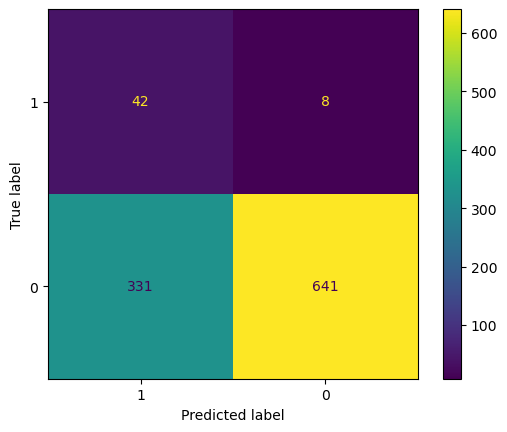

In [28]:
# Train model using best hyperparameters
cbc = CatBoostClassifier(iterations=138, random_seed=42, loss_function='Logloss', verbose=False, auto_class_weights='Balanced', depth=3, learning_rate=0.025, l2_leaf_reg=3)
cbc.fit(X_train, y_train)

# Evaluate model using confusion matrix
y_pred = cbc.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=[1,0]);

The model correctly identifies 42/50 stroke samples but at the cost of 331 false positives. I'll now try to improve on this performance by engineering the 'smoking_status' feature and then retraining a new model. Specifically, I will try to replace the 'Unknown' value by manually setting the smoking_status of those aged 18 and below to 'never smoked' and replace the rest with predictions made using another CatBoost model.

In [29]:
df2 = df.copy()
df2.loc[df2['age'] <= 18, 'smoking_status'] = 'never smoked'

In [30]:
X2 = df2.copy()
y = X2.pop('stroke')
X_train2, X_test2, y_train, y_test = train_test_split(X2, y, train_size=0.8, stratify=y, random_state=42)

In [31]:
def convert_unknown_smoking_status(X, y, depth_list, lr_list, l2_list):
    """This function trains a CatBoost Classifier to predict replacement values for 'Unknown' values in the smoking_status feature"""
    X_known_status = X.query('smoking_status != "Unknown"')
    X_unknown_status = X.query('smoking_status == "Unknown"').drop('smoking_status', axis=1)

    y_known_status = X_known_status.pop('smoking_status')
    unknown_indices = X_unknown_status.index

    params = {'depth': depth_list, 'learning_rate': lr_list, 'l2_leaf_reg': l2_list}

    cbc = CatBoostClassifier(iterations=2000, random_seed=42, loss_function='MultiClass', verbose=False, early_stopping_rounds=100)
    gridsearch_results = cbc.grid_search(param_grid=params, cv=3, X=X_known_status, y=y_known_status, stratified=True, 
                                         partition_random_seed=42, plot=False, search_by_train_test_split=False, refit=False)

    best_depth = gridsearch_results['params']['depth']
    best_lr = gridsearch_results['params']['learning_rate']
    best_l2 = gridsearch_results['params']['l2_leaf_reg']
    best_iteration = pd.DataFrame(gridsearch_results['cv_results']['test-MultiClass-mean']).sort_values(0).index[0] + 1

    cbc = CatBoostClassifier(iterations=best_iteration, random_seed=42, loss_function='MultiClass', verbose=False,
                             depth=best_depth, learning_rate=best_lr, l2_leaf_reg=best_l2)
    cbc.fit(X_known_status, y_known_status)
    X.loc[unknown_indices, 'smoking_status'] = cbc.predict(X_unknown_status)
    dummies = pd.get_dummies(X.smoking_status)
    X = pd.concat((X, dummies), axis=1).drop('smoking_status', axis=1)
    
    return X

In [32]:
ct2 = make_column_transformer((RobustScaler(), make_column_selector(dtype_exclude=object)),
                             (OneHotEncoder(sparse_output=False), ['gender', 'ever_married', 'work_type', 'Residence_type']), 
                             verbose_feature_names_out=False, remainder='passthrough')
ct2.set_output(transform='pandas')

preprocessing_pipeline2 = make_pipeline(fill_missing_transformer, ct2)

In [33]:
X_train2 = preprocessing_pipeline2.fit_transform(X_train2)
X_test2 = preprocessing_pipeline2.transform(X_test2)

In [ ]:
X_train2 = convert_unknown_smoking_status(X_train2, y_train, params['depth'], params['learning_rate'], params['l2_leaf_reg'])
X_test2 = convert_unknown_smoking_status(X_test2, y_test, params['depth'], params['learning_rate'], params['l2_leaf_reg'])

In [35]:
X_train2.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,formerly smoked,never smoked,smokes
845,0.083333,0.0,0.0,-0.620011,0.518919,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1,0
3745,-0.444444,0.0,0.0,-0.210498,-0.767568,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1,0
4184,-0.277778,0.0,0.0,0.752050,-0.583784,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1,0
3410,-0.194444,0.0,0.0,0.458994,0.475676,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1,0
284,-0.861111,0.0,0.0,-0.261072,0.356757,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0


In [ ]:
# Train new CatBoost model on training data with replaced Unknown smoking_status values
cbc2 = CatBoostClassifier(iterations=2000, random_seed=42, loss_function='Logloss', verbose=False, early_stopping_rounds=100, auto_class_weights='Balanced')
gridsearch_results = cbc2.grid_search(param_grid=params, cv=3, X=X_train2, y=y_train, stratified=True, 
                                     partition_random_seed=42, plot=True, search_by_train_test_split=False, refit=False)

In [37]:
gridsearch_results['params']

{'depth': 3, 'l2_leaf_reg': 2, 'learning_rate': 0.025}

In [38]:
# Approximate the best iteration
pd.DataFrame(gridsearch_results['cv_results']).sort_values('test-Logloss-mean')

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
142,142,0.478784,0.017978,0.425406,0.003902
143,143,0.478893,0.017976,0.425136,0.003773
144,144,0.478915,0.018059,0.424933,0.003644
141,141,0.478917,0.017748,0.425838,0.004114
145,145,0.478977,0.018130,0.424675,0.003558
...,...,...,...,...,...
4,4,0.640151,0.003580,0.637709,0.006387
3,3,0.649731,0.002945,0.647493,0.005404
2,2,0.661195,0.003265,0.659018,0.005901
1,1,0.671624,0.001918,0.670269,0.003260


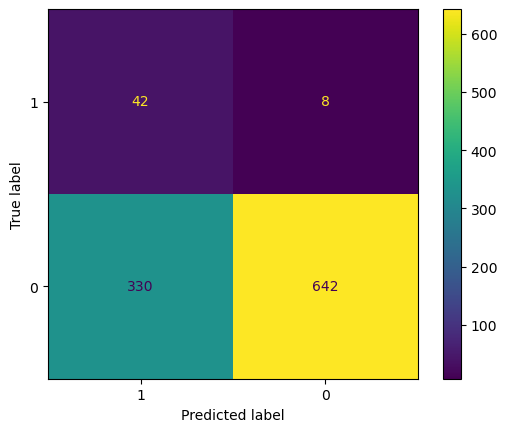

In [39]:
cbc2 = CatBoostClassifier(iterations=143, random_seed=42, loss_function='Logloss', verbose=False, auto_class_weights='Balanced', 
                         depth=3, learning_rate=0.025, l2_leaf_reg=2)
cbc2.fit(X_train2, y_train)

y_pred = cbc2.predict(X_test2)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=[1,0]);

Unfortunately, this approach only decreases the number of false positives by 1 from 331 to 330 while its performance in other areas remained the same.

In [41]:
cbc2.get_feature_importance(prettified=True)

,Feature Id,Importances
0,age,82.064082
1,avg_glucose_level,5.475457
2,bmi,4.089772
3,hypertension,2.872434
4,never smoked,1.247615
5,ever_married_No,0.502290
6,work_type_Self-employed,0.492483
7,gender_Female,0.489789
8,formerly smoked,0.419918
9,heart_disease,0.416137


## Error Analysis

In [42]:
# fp_indices = y_test[(y_pred - y_test) == 1].index
fn_indices = y_test[(y_pred - y_test) == -1].index

In [43]:
# Examine the false negative samples
df2.loc[fn_indices]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
133,Female,38.0,0,0,Yes,Private,Rural,101.45,NaN,formerly smoked,1
94,Male,45.0,0,0,Yes,Private,Rural,64.14,29.4,never smoked,1
182,Female,32.0,0,0,Yes,Private,Rural,76.13,29.9,smokes,1
88,Male,47.0,0,0,Yes,Private,Urban,86.94,41.1,formerly smoked,1
210,Female,39.0,0,0,Yes,Private,Urban,83.24,26.3,never smoked,1
245,Female,14.0,0,0,No,children,Rural,57.93,30.9,never smoked,1
31,Male,42.0,0,0,Yes,Private,Rural,83.41,25.4,Unknown,1
228,Female,39.0,0,0,Yes,Self-employed,Urban,97.76,29.6,smokes,1


* 2 out of the 8 false negatives are persons below the age of 37, which contains a total of only 3 stroke cases.
* Both bmi and avg_glucose_level values hover around their respective mean values; no particular value in any feature stand out.